### create directory for each tool

In [1]:
!mkdir adapter_removal cutadapt porifera skewer trimmomatic

### demultiplex and trim all reads (so forward barcodes don't influence expected read lengths)

In [2]:
!mkdir demultiplexed
!ln -fs ../../../../raw_data/simulated_reads/chr1_1M_hiseq_rr_score_samples/simulated_R1.fastq ./demultiplexed/
!ln -fs ../../../../raw_data/simulated_reads/chr1_1M_hiseq_rr_score_samples/simulated_R2.fastq ./demultiplexed/
!ln -fs ../../../../resources/barcodes/miseq_barcodes/mwanga_barcodes_combined.txt ./demultiplexed/

!python3 /Users/ryankuster/github/ngscomposer/tools/anemone.py -f 6 -r1 ./demultiplexed/simulated_R1.fastq -r2 ./demultiplexed/simulated_R2.fastq -m 1 -c ./demultiplexed/mwanga_barcodes_combined.txt -o ./demultiplexed/

redundant R1 barcodes detected
redundant R2 barcodes detected


### run trimmomatic (version 0.39)  
Trimmomatic was not included in the final analyses because there was no way to control for the minimum read length called as an adapter (12bp here). The simple adapter clip variable was set to 12 in these steps, which produce results that do not fairly represent Trimmmomatic's capabilities.

In [3]:
!gzip -k ./demultiplexed/combined.R1.fastq
!ln -fs ../demultiplexed/combined.R1.fastq.gz ./trimmomatic/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/trimmomatic_adapters_single.R1.fasta ./trimmomatic/

!head -n 5 ./trimmomatic/trimmomatic_adapters_single.R1.fasta

In [4]:
!time java -jar ~/tools/adapter_trimming/Trimmomatic-0.39/trimmomatic-0.39.jar SE -threads 1 -phred33 \
./trimmomatic/combined.R1.fastq.gz ./trimmomatic/trimmomatic_combined.R1.fastq.gz \
ILLUMINACLIP:./trimmomatic/trimmomatic_adapters_single.R1.fasta:0:0:12 MINLEN:0

TrimmomaticSE: Started with arguments:
 -threads 1 -phred33 ./trimmomatic/combined.R1.fastq.gz ./trimmomatic/trimmomatic_combined.R1.fastq.gz ILLUMINACLIP:./trimmomatic/trimmomatic_adapters_single.R1.fasta:0:0:12 MINLEN:0
Using Long Clipping Sequence: 'AGATCGGAAGAGCACACGTCTGAACTCCAGTCAC'
ILLUMINACLIP: Using 0 prefix pairs, 0 forward/reverse sequences, 1 forward only sequences, 0 reverse only sequences
Input Reads: 952102 Surviving: 952102 (100.00%) Dropped: 0 (0.00%)
TrimmomaticSE: Completed successfully
java -jar ~/tools/adapter_trimming/Trimmomatic-0.39/trimmomatic-0.39.jar SE    42.14s user 1.09s system 100% cpu 42.858 total


In [5]:
!gunzip ./trimmomatic/trimmomatic_combined.R1.fastq.gz

In [6]:
!python3 ../scripts/single_check_simulated_lengths.py ./trimmomatic/trimmomatic_combined.R1.fastq ./demultiplexed/combined.R1.fastq 8 trimmomatic_R1 5


all reads:
count    952102.000000
mean          0.718853
std           4.752401
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         215.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    757712
1    194390
Name: contaminated, dtype: int64

reads containing missed adapters:
0    900416
1     51686
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952102
Name: false_id, dtype: int64

misidentified reads:
count    51686.000000
mean        13.241903
std         15.818245
min          1.000000
25%          5.000000
50%         11.000000
75%         16.000000
max        215.000000
Name: o_minus_e, dtype: float64


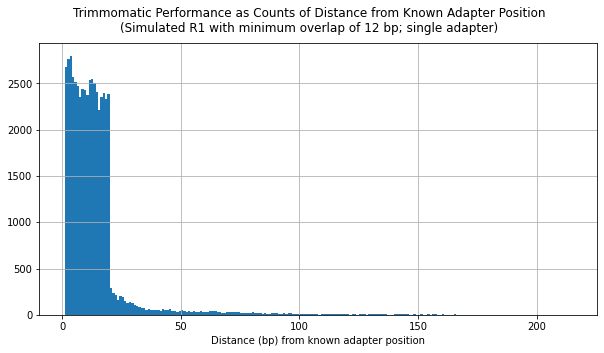

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('trimmomatic_R1_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Trimmomatic Performance as Counts of Distance from Known Adapter Position\n(Simulated R1 with minimum overlap of 12 bp; single adapter)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('single_trimmomatic_R1_misses.pdf')

In [8]:
!gzip -k ./demultiplexed/combined.R2.fastq
!ln -fs ../demultiplexed/combined.R2.fastq.gz ./trimmomatic/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/trimmomatic_adapters_single.R2.fasta ./trimmomatic/

!head -n 5 ./trimmomatic/trimmomatic_adapters_single.R2.fasta

In [9]:
!time java -jar ~/tools/adapter_trimming/Trimmomatic-0.39/trimmomatic-0.39.jar SE -threads 1 -phred33 \
./trimmomatic/combined.R2.fastq.gz ./trimmomatic/trimmomatic_combined.R2.fastq.gz \
ILLUMINACLIP:./trimmomatic/trimmomatic_adapters_single.R2.fasta:0:0:12 MINLEN:0

TrimmomaticSE: Started with arguments:
 -threads 1 -phred33 ./trimmomatic/combined.R2.fastq.gz ./trimmomatic/trimmomatic_combined.R2.fastq.gz ILLUMINACLIP:./trimmomatic/trimmomatic_adapters_single.R2.fasta:0:0:12 MINLEN:0
Using Long Clipping Sequence: 'AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT'
ILLUMINACLIP: Using 0 prefix pairs, 0 forward/reverse sequences, 1 forward only sequences, 0 reverse only sequences
Input Reads: 952102 Surviving: 952102 (100.00%) Dropped: 0 (0.00%)
TrimmomaticSE: Completed successfully
java -jar ~/tools/adapter_trimming/Trimmomatic-0.39/trimmomatic-0.39.jar SE    46.17s user 1.05s system 101% cpu 46.587 total


In [10]:
!gunzip ./trimmomatic/trimmomatic_combined.R2.fastq.gz

In [11]:
!python3 ../scripts/single_check_simulated_lengths.py ./trimmomatic/trimmomatic_combined.R2.fastq ./demultiplexed/combined.R2.fastq 8 trimmomatic_R2 4


all reads:
count    952102.000000
mean          0.928373
std           6.320662
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         215.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    757712
1    194390
Name: contaminated, dtype: int64

reads containing missed adapters:
0    897097
1     55005
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952102
Name: false_id, dtype: int64

misidentified reads:
count    55005.000000
mean        16.069557
std         21.171162
min          1.000000
25%          6.000000
50%         11.000000
75%         17.000000
max        215.000000
Name: o_minus_e, dtype: float64


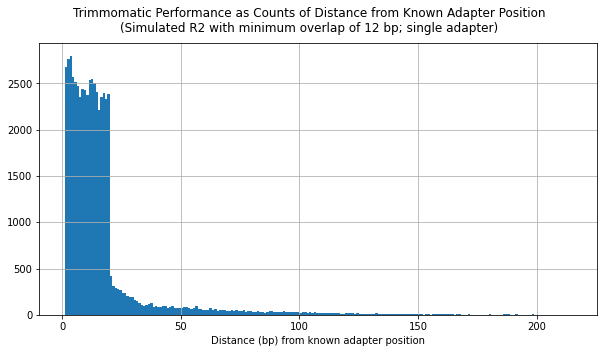

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('trimmomatic_R2_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Trimmomatic Performance as Counts of Distance from Known Adapter Position\n(Simulated R2 with minimum overlap of 12 bp; single adapter)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('single_trimmomatic_R2_misses.pdf')

### run porifera (version 0.4.7 commit 'b1ce4a2')

In [13]:
!ln -fs ../demultiplexed/combined.R1.fastq ./porifera
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/adapters_single.R1.txt ./porifera/

!head -n 5 ./porifera/adapters_single.R1.txt

GTGACTGGAGTTCAGACGTGTGCTCTTCCGATCT


In [14]:
!time python3 /Users/ryankuster/github/ngscomposer/tools/porifera.py -r1 ./porifera/combined.R1.fastq -a1 ./porifera/adapters_single.R1.txt -m 12 -l 0 -o ./porifera/


python3 /Users/ryankuster/github/ngscomposer/tools/porifera.py -r1  -a1  -m 1  15.38s user 1.66s system 97% cpu 17.417 total


In [15]:
!python3 ../scripts/single_check_simulated_lengths.py ./porifera/adapted.combined.R1.fastq ./demultiplexed/combined.R1.fastq 8 porifera_R1 5


all reads:
count    952102.000000
mean          0.202380
std           1.527447
min        -176.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         185.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    757712
1    194390
Name: contaminated, dtype: int64

reads containing missed adapters:
0    922726
1     29376
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952100
1         2
Name: false_id, dtype: int64

misidentified reads:
count    29378.000000
mean         6.558854
std          5.824289
min       -176.000000
25%          3.000000
50%          6.000000
75%          9.000000
max        185.000000
Name: o_minus_e, dtype: float64


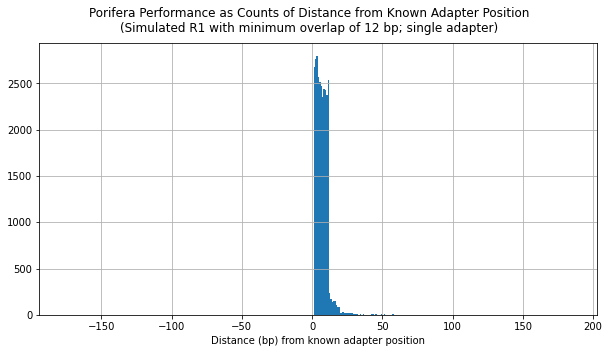

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('porifera_R1_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Porifera Performance as Counts of Distance from Known Adapter Position\n(Simulated R1 with minimum overlap of 12 bp; single adapter)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('single_porifera_R1_misses.pdf')

In [17]:
!ln -fs ../demultiplexed/combined.R2.fastq ./porifera
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/adapters_single.R2.txt ./porifera/

!head -n 5 ./porifera/adapters_single.R2.txt

ACACTCTTTCCCTACACGACGCTCTTCCGATCT


In [18]:
!time python3 /Users/ryankuster/github/ngscomposer/tools/porifera.py -r1 ./porifera/combined.R2.fastq -a1 ./porifera/adapters_single.R2.txt -m 12 -l 0 -o ./porifera/

python3 /Users/ryankuster/github/ngscomposer/tools/porifera.py -r1  -a1  -m 1  13.83s user 1.29s system 98% cpu 15.417 total


In [19]:
!python3 ../scripts/single_check_simulated_lengths.py ./porifera/adapted.combined.R2.fastq ./demultiplexed/combined.R2.fastq 8 porifera_R2 4

all reads:
count    952102.000000
mean          0.222527
std           1.804439
min        -181.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         209.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    757712
1    194390
Name: contaminated, dtype: int64

reads containing missed adapters:
0    921921
1     30181
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952101
1         1
Name: false_id, dtype: int64

misidentified reads:
count    30182.000000
mean         7.019681
std          7.416170
min       -181.000000
25%          3.000000
50%          6.000000
75%          9.000000
max        209.000000
Name: o_minus_e, dtype: float64


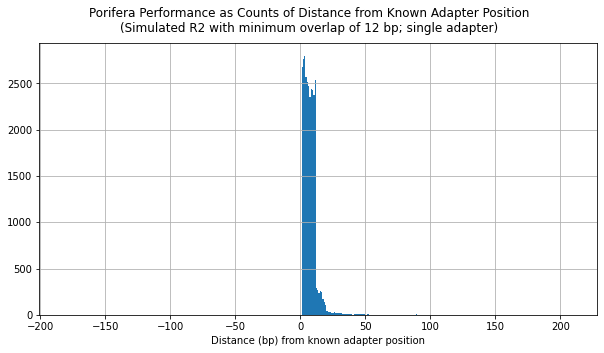

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('porifera_R2_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Porifera Performance as Counts of Distance from Known Adapter Position\n(Simulated R2 with minimum overlap of 12 bp; single adapter)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('single_porifera_R2_misses.pdf')

### run adapterremoval (version 2.3.1 commit 'e5d15a7')

In [21]:
!ln -fs ../demultiplexed/combined.R1.fastq ./adapter_removal/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/adapterremoval_adapters_single.R1.txt ./adapter_removal/

!head -n 5 ./adapter_removal/adapterremoval_adapters_single.R1.txt

AGATCGGAAGAGCACACGTCTGAACTCCAGTCAC


In [22]:
!time /usr/local/bin/AdapterRemoval --file1 ./adapter_removal/combined.R1.fastq --adapter-list ./adapter_removal/adapterremoval_adapters_single.R1.txt --minlength 0 --minadapteroverlap 12

Read 1 adapters / adapter pairs from './adapter_removal/adapterremoval_adapters_single.R1.txt'...
Trimming single ended reads ...
Opening FASTQ file './adapter_removal/combined.R1.fastq', line numbers start at 1
Processed a total of 952,102 reads in 9.1s; 104,000 reads per second on average ...
/usr/local/bin/AdapterRemoval --file1 ./adapter_removal/combined.R1.fastq      7.28s user 1.58s system 97% cpu 9.136 total


In [23]:
!mv your_output* ./adapter_removal/

!python3 ../scripts/single_check_simulated_lengths.py ./adapter_removal/your_output.truncated ./demultiplexed/combined.R1.fastq 8 adapterremoval_R1 5


all reads:
count    952102.000000
mean          0.127245
std           1.600115
min        -202.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    757712
1    194390
Name: contaminated, dtype: int64

reads containing missed adapters:
0    924168
1     27934
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    949058
1      3044
Name: false_id, dtype: int64

misidentified reads:
count    30978.000000
mean         3.910840
std          7.993577
min       -202.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         13.000000
Name: o_minus_e, dtype: float64


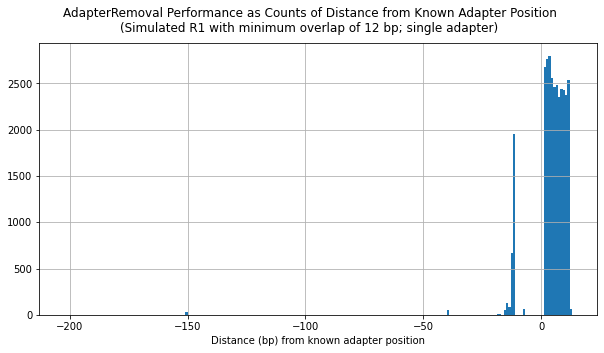

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('adapterremoval_R1_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('AdapterRemoval Performance as Counts of Distance from Known Adapter Position\n(Simulated R1 with minimum overlap of 12 bp; single adapter)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('single_adapterremoval_R1_misses.pdf')

In [25]:
!ln -fs ../demultiplexed/combined.R2.fastq ./adapter_removal/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/adapterremoval_adapters_single.R2.txt ./adapter_removal/

!head -n 5 ./adapter_removal/adapterremoval_adapters_single.R2.txt

AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT


In [26]:
!time /usr/local/bin/AdapterRemoval --file1 ./adapter_removal/combined.R2.fastq --adapter-list ./adapter_removal/adapterremoval_adapters_single.R2.txt --minlength 0 --minadapteroverlap 12

Read 1 adapters / adapter pairs from './adapter_removal/adapterremoval_adapters_single.R2.txt'...
Trimming single ended reads ...
Opening FASTQ file './adapter_removal/combined.R2.fastq', line numbers start at 1
Processed a total of 952,102 reads in 7.1s; 134,000 reads per second on average ...
/usr/local/bin/AdapterRemoval --file1 ./adapter_removal/combined.R2.fastq      5.68s user 1.30s system 98% cpu 7.092 total


In [27]:
!mv your_output* ./adapter_removal/

!python3 ../scripts/single_check_simulated_lengths.py ./adapter_removal/your_output.truncated ./demultiplexed/combined.R2.fastq 8 adapterremoval_R2 4


all reads:
count    952102.000000
mean          0.111707
std           2.072554
min        -184.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          81.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    757712
1    194390
Name: contaminated, dtype: int64

reads containing missed adapters:
0    924260
1     27842
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    949027
1      3075
Name: false_id, dtype: int64

misidentified reads:
count    30917.000000
mean         3.440049
std         10.992505
min       -184.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         81.000000
Name: o_minus_e, dtype: float64


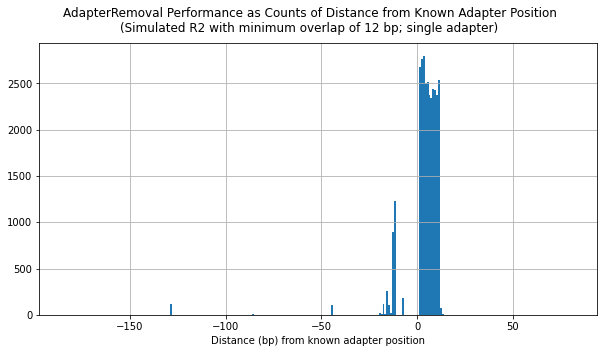

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('adapterremoval_R2_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('AdapterRemoval Performance as Counts of Distance from Known Adapter Position\n(Simulated R2 with minimum overlap of 12 bp; single adapter)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('single_adapterremoval_R2_misses.pdf')

### run skewer (version 0.2.2 commit '978e8e4')

In [29]:
!ln -fs ../demultiplexed/combined.R1.fastq ./skewer/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/skewer_adapters_single.R1.fasta ./skewer/

!head -n 5 ./skewer/skewer_adapters_single.R1.fasta

>
AGATCGGAAGAGCACACGTCTGAACTCCAGTCAC


In [30]:
!time /usr/local/bin/skewer -l 0 -k 12 -x ./skewer/skewer_adapters_single.R1.fasta ./skewer/combined.R1.fastq

.--. .-.
: .--': :.-.
`. `. : `'.' .--. .-..-..-. .--. .--.
_`, :: . `.' '_.': `; `; :' '_.': ..'
`.__.':_;:_;`.__.'`.__.__.'`.__.':_;
skewer v0.2.2 [April 4, 2016]
Parameters used:
-- 3' end adapter sequences in file (-x):	./skewer/skewer_adapters_single.R1.fasta
A:	AGATCGGAAGAGCACACGTCTGAACTCCAGTCAC
-- maximum error ratio allowed (-r):	0.100
-- maximum indel error ratio allowed (-d):	0.030
-- minimum read length allowed after trimming (-l):	0
-- file format (-f):		Sanger/Illumina 1.8+ FASTQ (auto detected)
-- minimum overlap length for adapter detection (-k):	12
Thu Jan 14 09:32:41 2021 >> started
|=================================================>| (100.00%)
Thu Jan 14 09:32:54 2021 >> done (24.965s)
952102 reads processed; of these:
952102 (100.00%) reads available; of these:
163544 (17.18%) trimmed reads available after processing
788558 (82.82%) untrimmed reads available after processing
log has been saved to "./skewer/combined.R1-trimmed.log".
/usr/local/bin/skewer -l 0 -k 12 -x

In [31]:
!python3 ../scripts/single_check_simulated_lengths.py ./skewer/combined.R1-trimmed.fastq ./demultiplexed/combined.R1.fastq 8 skewer_R1 5


all reads:
count    952102.000000
mean          0.177582
std           1.266721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         185.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    757712
1    194390
Name: contaminated, dtype: int64

reads containing missed adapters:
0    923985
1     28117
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952102
Name: false_id, dtype: int64

misidentified reads:
count    28117.000000
mean         6.013302
std          4.386720
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max        185.000000
Name: o_minus_e, dtype: float64


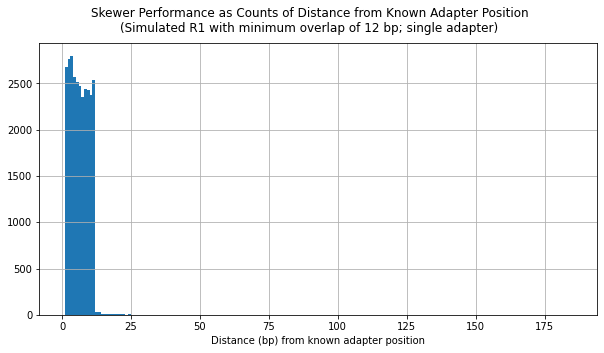

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('skewer_R1_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Skewer Performance as Counts of Distance from Known Adapter Position\n(Simulated R1 with minimum overlap of 12 bp; single adapter)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('single_skewer_R1_misses.pdf')

In [33]:
!ln -fs ../demultiplexed/combined.R2.fastq ./skewer/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/skewer_adapters_single.R2.fasta ./skewer/

!head -n 5 ./skewer/skewer_adapters_single.R2.fasta

>
AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT


In [34]:
!time /usr/local/bin/skewer -l 0 -k 12 -x ./skewer/skewer_adapters_single.R2.fasta ./skewer/combined.R2.fastq

.--. .-.
: .--': :.-.
`. `. : `'.' .--. .-..-..-. .--. .--.
_`, :: . `.' '_.': `; `; :' '_.': ..'
`.__.':_;:_;`.__.'`.__.__.'`.__.':_;
skewer v0.2.2 [April 4, 2016]
Parameters used:
-- 3' end adapter sequences in file (-x):	./skewer/skewer_adapters_single.R2.fasta
A:	AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT
-- maximum error ratio allowed (-r):	0.100
-- maximum indel error ratio allowed (-d):	0.030
-- minimum read length allowed after trimming (-l):	0
-- file format (-f):		Sanger/Illumina 1.8+ FASTQ (auto detected)
-- minimum overlap length for adapter detection (-k):	12
Thu Jan 14 09:33:05 2021 >> started
|=================================================>| (100.00%)
Thu Jan 14 09:33:20 2021 >> done (28.895s)
952102 reads processed; of these:
952102 (100.00%) reads available; of these:
163453 (17.17%) trimmed reads available after processing
788649 (82.83%) untrimmed reads available after processing
log has been saved to "./skewer/combined.R2-trimmed.log".
/usr/local/bin/skewer -l 0 -k 12 -x 

In [35]:
!python3 ../scripts/single_check_simulated_lengths.py ./skewer/combined.R2-trimmed.fastq ./demultiplexed/combined.R2.fastq 8 skewer_R2 4


all reads:
count    952102.000000
mean          0.180050
std           1.317329
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         214.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    757712
1    194390
Name: contaminated, dtype: int64

reads containing missed adapters:
0    923888
1     28214
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952102
Name: false_id, dtype: int64

misidentified reads:
count    28214.00000
mean         6.07592
std          4.76852
min          1.00000
25%          3.00000
50%          6.00000
75%          9.00000
max        214.00000
Name: o_minus_e, dtype: float64


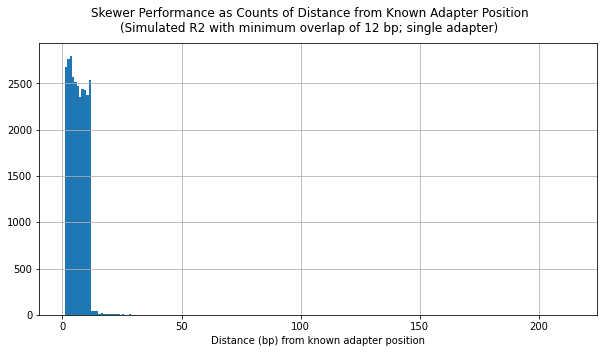

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('skewer_R2_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Skewer Performance as Counts of Distance from Known Adapter Position\n(Simulated R2 with minimum overlap of 12 bp; single adapter)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('single_skewer_R2_misses.pdf')

### run cutadapt (version 3.1 commit 'b47e1fa')

In [37]:
!ln -fs ../demultiplexed/combined.R1.fastq ./cutadapt/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/cutadapt_adapters_single.R1.sh ./cutadapt/

!head -n 5 ./cutadapt/cutadapt_adapters_single.R1.sh

/usr/local/bin/cutadapt --minimum-length 0 \
-a "AGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12" \
-o ./cutadapt/cutadapt_combined.R1.fastq ./cutadapt/combined.R1.fastq


In [38]:
!time bash ./cutadapt/cutadapt_adapters_single.R1.sh

This is cutadapt 3.1 with Python 3.8.6
Command line parameters: --minimum-length 0 -a AGATCGGAAGAGCACACGTCTGAACTCCAGTCAC;min_overlap=12 -o ./cutadapt/cutadapt_combined.R1.fastq ./cutadapt/combined.R1.fastq
Processing reads on 1 core in single-end mode ...
[      8<----] 00:00:13       952,102 reads  @     14.5 µs/read;   4.13 M reads/minute
Finished in 13.86 s (15 µs/read; 4.12 M reads/minute).

=== Summary ===

Total reads processed:                 952,102
Reads with adapters:                   165,660 (17.4%)
Reads that were too short:                   0 (0.0%)
Reads written (passing filters):       952,102 (100.0%)

Total basepairs processed:   224,197,916 bp
Total written (filtered):    213,798,211 bp (95.4%)

=== Adapter 1 ===

Sequence: AGATCGGAAGAGCACACGTCTGAACTCCAGTCAC; Type: regular 3'; Length: 34; Trimmed: 165660 times

No. of allowed errors:
1-9 bp: 0; 10-19 bp: 1; 20-29 bp: 2; 30-34 bp: 3

Bases preceding removed adapters:
  A: 24.0%
  C: 27.2%
  G: 24.8%
  T: 24.0%
  non

In [39]:
!python3 ../scripts/single_check_simulated_lengths.py ./cutadapt/cutadapt_combined.R1.fastq ./demultiplexed/combined.R1.fastq 8 cutadapt_R1 5


all reads:
count    952102.000000
mean          0.160338
std           1.387019
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         185.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    757712
1    194390
Name: contaminated, dtype: int64

reads containing missed adapters:
0    926097
1     26005
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952102
Name: false_id, dtype: int64

misidentified reads:
count    26005.000000
mean         5.870333
std          6.075959
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max        185.000000
Name: o_minus_e, dtype: float64


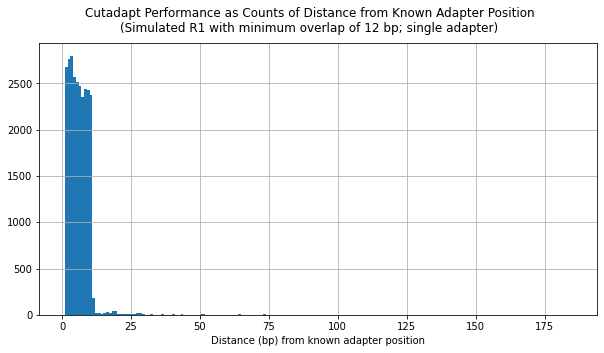

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cutadapt_R1_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Cutadapt Performance as Counts of Distance from Known Adapter Position\n(Simulated R1 with minimum overlap of 12 bp; single adapter)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('single_cutadapt_R1_misses.pdf')

In [41]:
!ln -fs ../demultiplexed/combined.R2.fastq ./cutadapt/
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/tool_comparisons/cutadapt_adapters_single.R2.sh ./cutadapt/

!head -n 5 ./cutadapt/cutadapt_adapters.R2.sh

head: ./cutadapt/cutadapt_adapters.R2.sh: No such file or directory


In [42]:
!time bash ./cutadapt/cutadapt_adapters_single.R2.sh

This is cutadapt 3.1 with Python 3.8.6
Command line parameters: --minimum-length 0 -a AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT;min_overlap=12 -o ./cutadapt/cutadapt_combined.R2.fastq ./cutadapt/combined.R2.fastq
Processing reads on 1 core in single-end mode ...
[      8<----] 00:00:13       952,102 reads  @     14.2 µs/read;   4.22 M reads/minute
Finished in 13.56 s (14 µs/read; 4.21 M reads/minute).

=== Summary ===

Total reads processed:                 952,102
Reads with adapters:                   165,336 (17.4%)
Reads that were too short:                   0 (0.0%)
Reads written (passing filters):       952,102 (100.0%)

Total basepairs processed:   224,218,317 bp
Total written (filtered):    213,827,537 bp (95.4%)

=== Adapter 1 ===

Sequence: AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT; Type: regular 3'; Length: 33; Trimmed: 165336 times

No. of allowed errors:
1-9 bp: 0; 10-19 bp: 1; 20-29 bp: 2; 30-33 bp: 3

Bases preceding removed adapters:
  A: 24.1%
  C: 26.0%
  G: 25.0%
  T: 24.9%
  none/

In [43]:
!python3 ../scripts/single_check_simulated_lengths.py ./cutadapt/cutadapt_combined.R2.fastq ./demultiplexed/combined.R2.fastq 8 cutadapt_R2 4


all reads:
count    952102.000000
mean          0.169727
std           1.563664
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         214.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    757712
1    194390
Name: contaminated, dtype: int64

reads containing missed adapters:
0    925765
1     26337
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952102
Name: false_id, dtype: int64

misidentified reads:
count    26337.000000
mean         6.135741
std          7.196259
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max        214.000000
Name: o_minus_e, dtype: float64


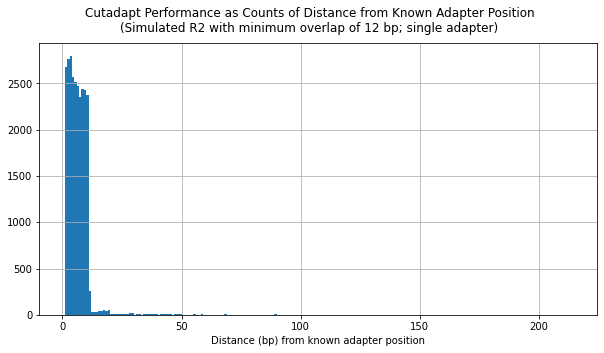

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cutadapt_R2_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Cutadapt Performance as Counts of Distance from Known Adapter Position\n(Simulated R2 with minimum overlap of 12 bp; single adapter)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('single_cutadapt_R2_misses.pdf')